In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

df = pd.read_csv('C:\Tests\Klarna\klarna\dataset.csv', sep=';')

test = df[df['default'].isna()]
test.shape

train = df[~df['default'].isna()]
print(train.shape)
train['default'].value_counts()



(89976, 43)


default
0.0    88688
1.0     1288
Name: count, dtype: int64

## Risk Buckeeting

* Use only numerical columns
* Replace All Nans to median of their respective columns                
* Use standardization for Feature Scaling and apply Elbow method and silhouette method to find number of clusters
 

In [3]:
data = train.copy(deep=True)
data['has_paid'] = data['has_paid'].astype('float')

In [9]:
categorical_columns = [
'account_status',
'account_worst_status_0_3m',
'account_worst_status_12_24m',
'account_worst_status_3_6m',
'account_worst_status_6_12m',
'merchant_category',
'merchant_group',
'name_in_email',
'status_last_archived_0_24m', 
'status_2nd_last_archived_0_24m', 
'status_3rd_last_archived_0_24m', 
'status_max_archived_0_6_months', 
'status_max_archived_0_12_months', 
'status_max_archived_0_24_months',
'worst_status_active_inv' ]


numerical_cols = set(data.columns) - set(categorical_columns) - set(['uuid','has_paid','default'])

In [15]:
numerical_credit = data[list(numerical_cols)]

In [16]:
# numerical_credit

,num_arch_dc_12_24m,sum_capital_paid_account_0_12m,account_days_in_term_12_24m,sum_capital_paid_account_12_24m,num_active_inv,time_hours,account_days_in_rem_12_24m,max_paid_inv_0_12m,avg_payment_span_0_3m,max_paid_inv_0_24m,...,num_arch_ok_0_12m,age,num_arch_written_off_0_12m,account_incoming_debt_vs_paid_0_24m,num_unpaid_bills,avg_payment_span_0_12m,account_days_in_dc_12_24m,account_amount_added_12_24m,num_arch_written_off_12_24m,num_active_div_by_paid_inv_0_12m
0,0,0,0.0,0,2,9.653333,0.0,31638.0,8.333333,31638.0,...,13,20,0.0,0.0,2,12.692308,0.0,0,0.0,0.153846
1,0,0,0.0,0,0,13.181389,0.0,13749.0,25.000000,13749.0,...,9,50,0.0,NaN,0,25.833333,0.0,0,0.0,0.000000
2,0,0,0.0,0,1,11.561944,0.0,29890.0,18.000000,29890.0,...,11,22,0.0,NaN,1,20.000000,0.0,0,0.0,0.071429
3,0,0,NaN,0,1,15.751111,NaN,40040.0,4.888889,40040.0,...,31,36,0.0,NaN,1,4.687500,NaN,0,0.0,0.031250
4,0,0,0.0,0,0,12.698611,0.0,7100.0,13.000000,7100.0,...,1,25,0.0,NaN,0,13.000000,0.0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89971,0,0,0.0,0,0,14.919722,0.0,0.0,NaN,0.0,...,0,70,NaN,NaN,0,NaN,0.0,0,NaN,NaN
89972,0,0,0.0,0,0,11.846667,0.0,2380.0,8.000000,2380.0,...,6,25,0.0,NaN,0,10.166667,0.0,0,0.0,0.000000
89973,0,0,0.0,0,0,18.681944,0.0,10790.0,15.000000,10790.0,...,9,34,0.0,NaN,0,13.555556,0.0,0,0.0,0.000000
89974,0,0,0.0,0,0,11.964444,0.0,4580.0,12.500000,4580.0,...,5,51,0.0,NaN,0,13.400000,0.0,0,0.0,0.000000


In [18]:


l = list(numerical_cols)
for col in l:
    numerical_credit.loc[:,col] = numerical_credit[col].fillna(numerical_credit[col].median())

# verify if no Nan Values in dataframe
(numerical_credit.values <0).any()


False

c:\Tests\Klarna\klarna\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Tests\Klarna\klarna\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Tests\Klarna\klarna\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Tests\Klarna\klarna\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Tests\Klarna\klarna\lib\site-packages\sklearn\cluster\_kmeans

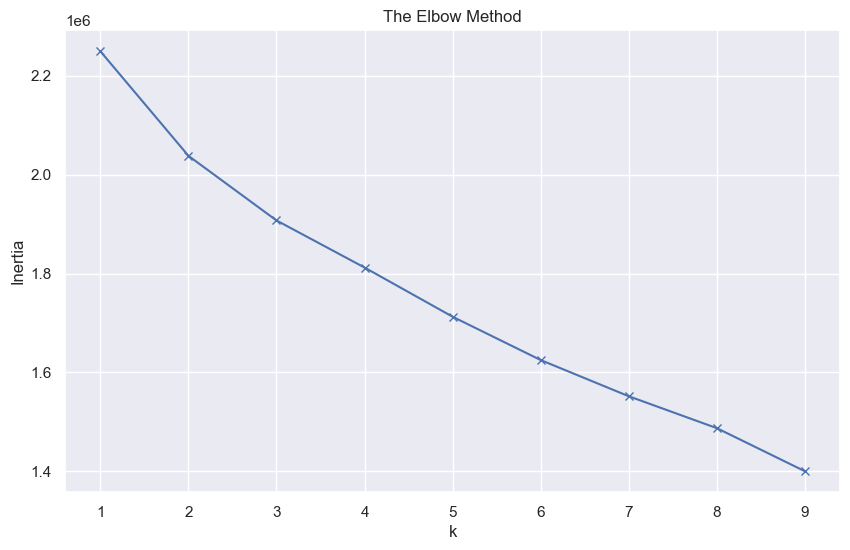

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)
        
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

As the above curve does not become flat, it looks like the dataset can be treated as one big cluster with k=1

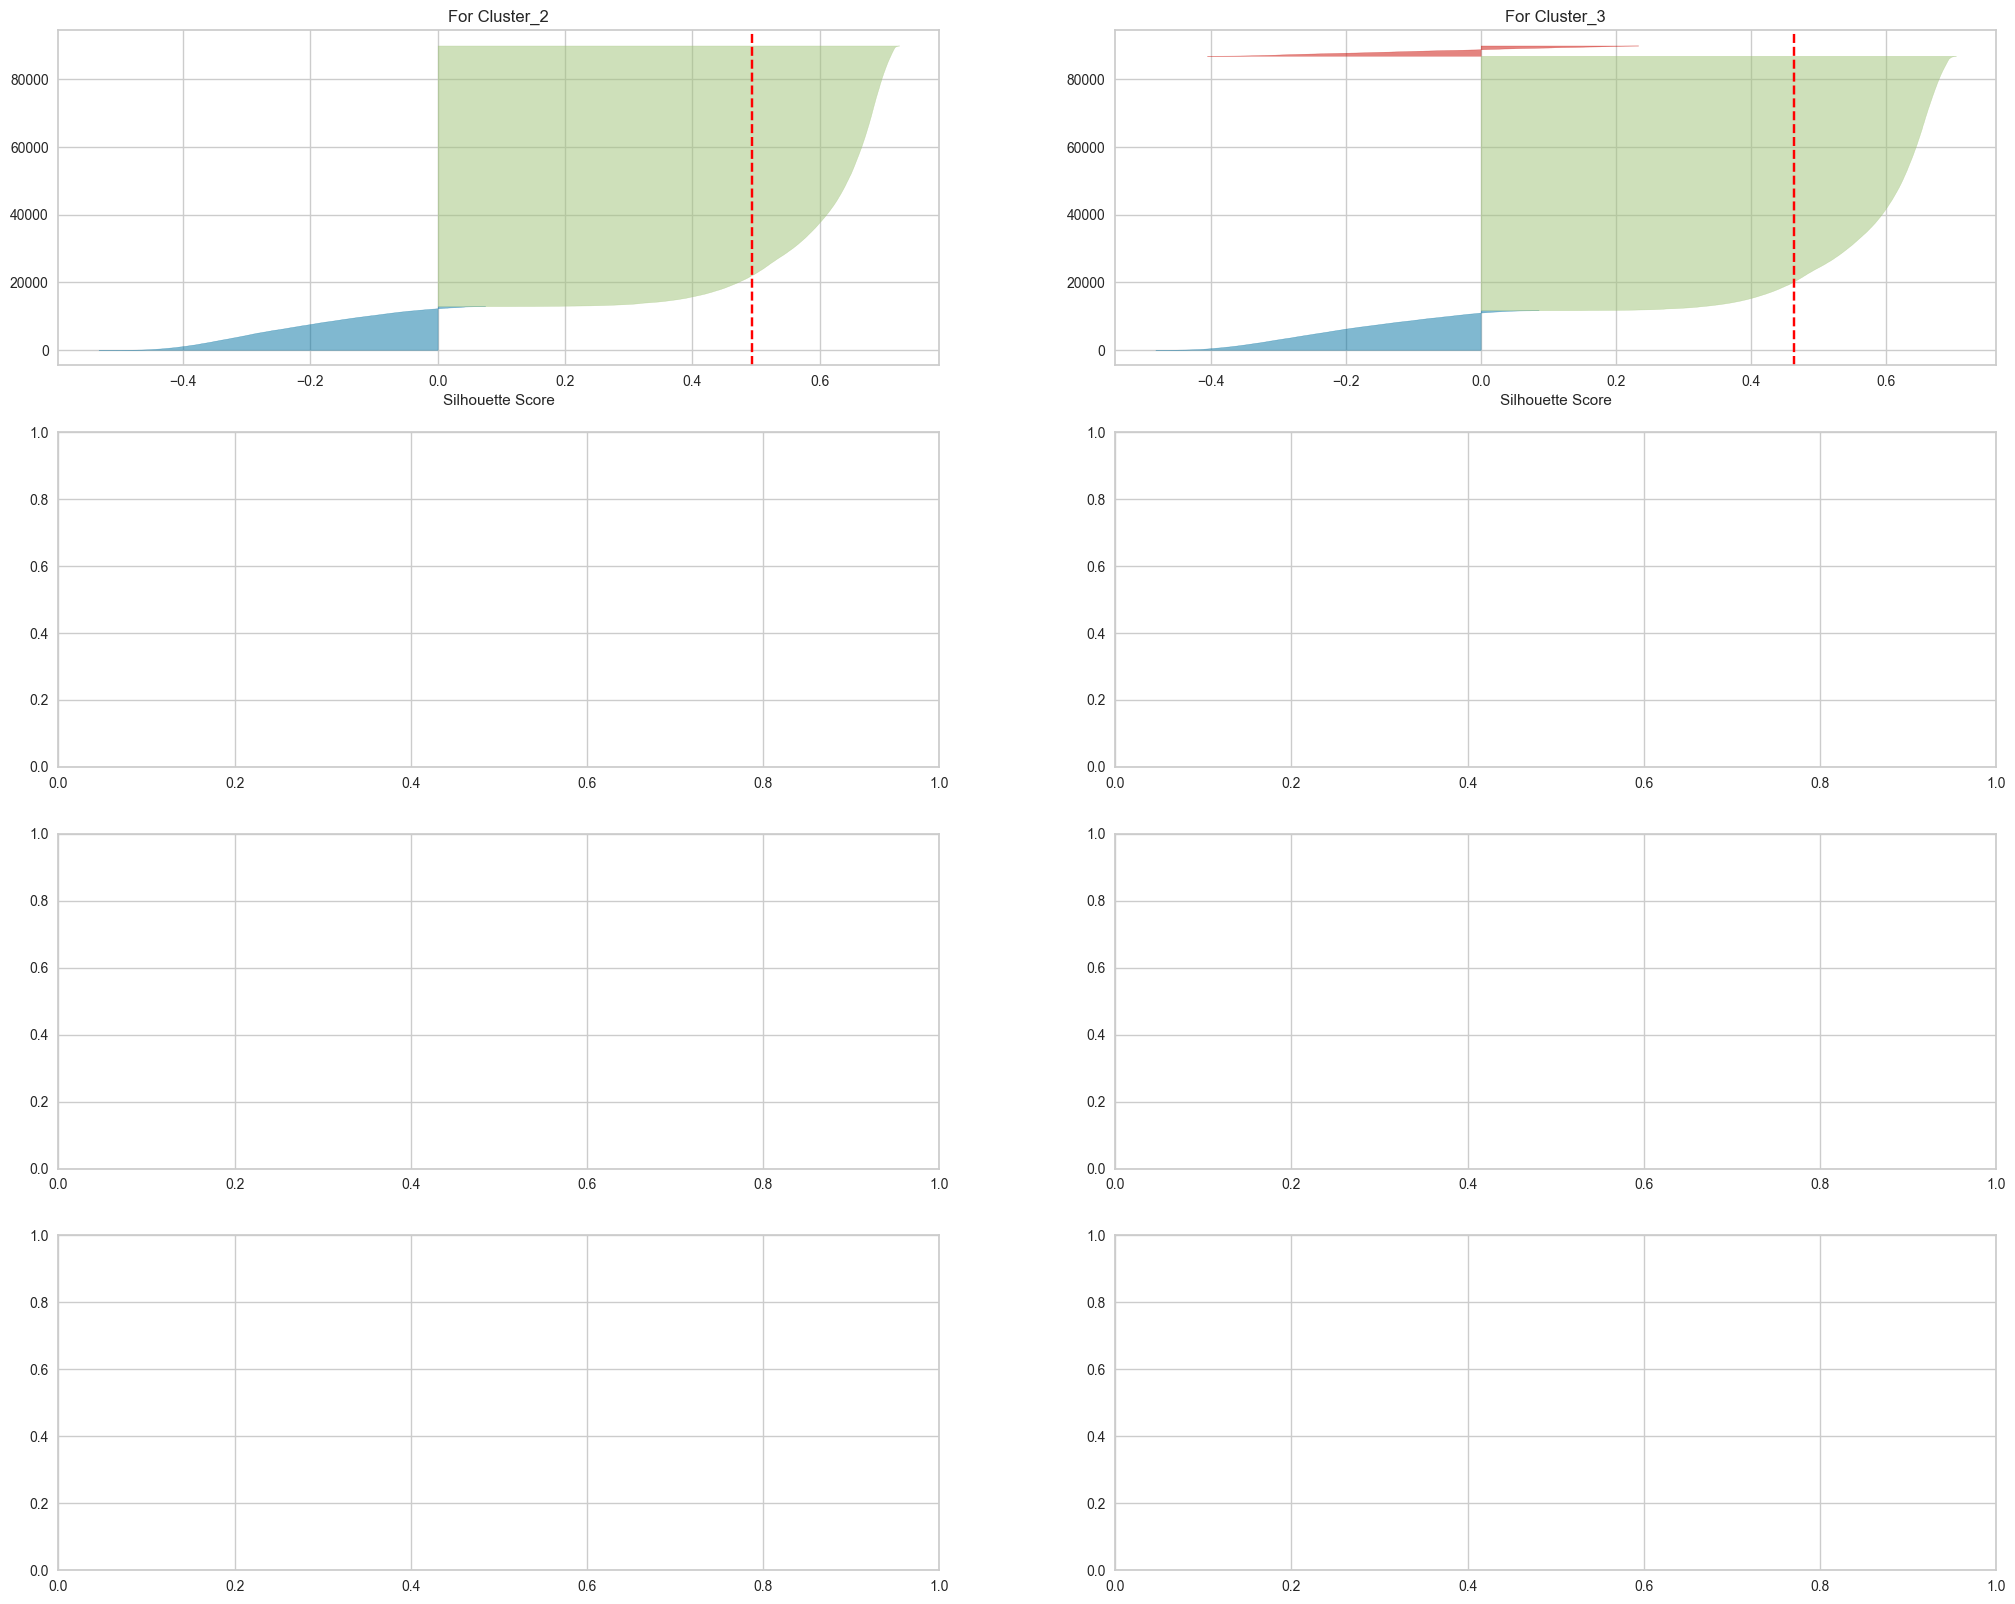

In [21]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 4):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2) 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                    ax=ax[q - 1][r]) 
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")